In [1]:
!pip install pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 10.9 MB/s eta 0:00:00


In [ ]:
from pyscf import gto, scf

# Define the H2 molecule
mol = gto.M(
    atom = 'H 0 0 0; H 0 0 0.74',  # H2 with bond length of 0.74 angstroms
    basis = 'sto-3g',               # Minimal basis set
    unit = 'Angstrom'
)

# Perform Hartree-Fock calculation
mf = scf.RHF(mol)    # Restricted Hartree-Fock for closed-shell molecules
hf_energy = mf.kernel()

print("Hartree-Fock ground state energy of H2 (in Hartree):", hf_energy)


converged SCF energy = -1.11675930739643
Hartree-Fock ground state energy of H2 (in Hartree): -1.1167593073964255


In [ ]:
from pyscf import gto, scf

# Paste the XYZ structure as a multi-line string
paracetamol_xyz = '''
C   0.000   1.402   0.000
C   1.214   0.701   0.000
C   1.214  -0.701   0.000
C   0.000  -1.402   0.000
C  -1.214  -0.701   0.000
C  -1.214   0.701   0.000
O   2.337   1.256   0.000
N   2.029  -1.221   0.000
C   3.233  -1.950   0.000
O   3.469  -3.105   0.000
H  -0.000   2.490   0.000
H   2.155   1.233   0.893
H   2.155   1.233  -0.893
H   0.000  -2.490   0.000
H  -2.155  -1.233  -0.893
H  -2.155  -1.233   0.893
H  -2.155   1.233  -0.893
H  -2.155   1.233   0.893
H   4.196  -1.431   0.000
H   4.323  -3.667   0.000
'''

# Create molecule object
mol = gto.M(
    atom = paracetamol_xyz,
    basis = 'sto-3g',   # You can use a bigger basis if you have RAM
    unit = 'Angstrom',
    charge = 0,
    spin = 0            # 0 = singlet; for neutral paracetamol
)

# Hartree-Fock calculation
mf = scf.RHF(mol)
hf_energy = mf.kernel()

print("Hartree-Fock ground state energy of paracetamol (in Hartree):", hf_energy)


RuntimeError: Electron number 75 and spin 0 are not consistent
Note mol.spin = 2S = Nalpha - Nbeta, not 2S+1

In [ ]:
from pyscf import gto, scf

paracetamol_xyz = """
C   0.0039    1.1875    0.0000
C   1.2076    0.4750    0.0000
C   1.1903   -0.9301    0.0000
C  -0.0107   -1.6351    0.0000
C  -1.2042   -0.9252    0.0000
C  -1.1893    0.4826    0.0000
O   2.3639    1.0901    0.0000
N   2.3775   -1.6213    0.0000
C   3.6414   -1.0928    0.0000
O   4.5352   -1.7821    0.0000
H   0.0102    2.2738    0.0000
H   2.1469    0.9335    0.0000
H   2.1462   -2.5756    0.0000
H   3.6116    0.0074    0.0000
H  -0.0221   -2.7186    0.0000
H  -2.1527   -1.3778    0.0000
H  -2.1381    0.9435    0.0000
H   3.7838   -0.1368    0.0000
H   4.3311   -2.7864    0.0000
"""

mol = gto.M(
    atom = paracetamol_xyz,
    basis = 'sto-3g',
    unit = 'Angstrom',
    charge = 0,   # neutral
    spin = 0      # closed shell (even number of electrons)
)

mf = scf.RHF(mol)
hf_energy = mf.kernel()

print("Hartree-Fock ground state energy of paracetamol (in Hartree):", hf_energy)


converged SCF energy = -461.0289413706
Hartree-Fock ground state energy of paracetamol (in Hartree): -461.02894137060036


converged SCF energy = -7.02841009454193
-7.028410094541927
converged SCF energy = -7.47640353216986
-7.4764035321698605
converged SCF energy = -7.69648910935012
-7.69648910935012
converged SCF energy = -7.80236051162211
-7.80236051162211
converged SCF energy = -7.84875902752193
-7.848759027521927
converged SCF energy = -7.86301165982498
-7.8630116598249815
converged SCF energy = -7.85919528053405
-7.859195280534052
converged SCF energy = -7.84511737188055
-7.845117371880553
converged SCF energy = -7.82532283365732
-7.825322833657324
converged SCF energy = -7.80256060872783
-7.802560608727828
converged SCF energy = -7.77853138811775
-7.778531388117747
converged SCF energy = -7.75435358717968
-7.754353587179676
converged SCF energy = -7.73083786412109
-7.7308378641210895
converged SCF energy = -7.7085589712274
-7.708558971227399
converged SCF energy = -7.68796157519628
-7.687961575196285
converged SCF energy = -7.66931315300374
-7.669313153003739
converged SCF energy = -7.65273409991434

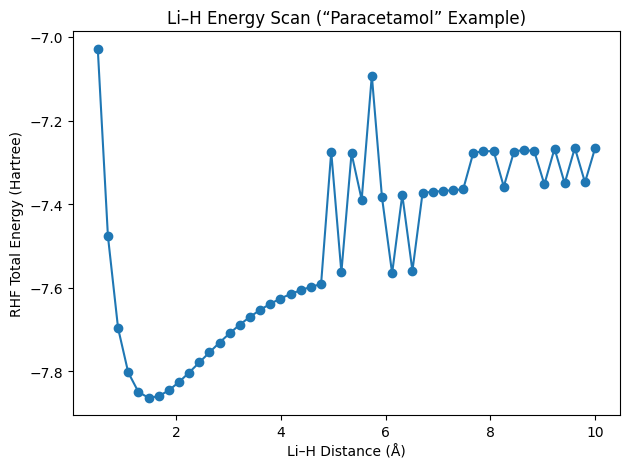

In [3]:
import numpy as np
from pyscf import gto, scf
import matplotlib.pyplot as plt

# Define the range of Li–H distances (Å)
distances = np.linspace(0.5, 10.0, 50)
energies = []

# Loop over distances and compute RHF energy for each geometry
for d in distances:
    # Update the “paracetamol_xyz” string with the current H position
    paracetamol_xyz = f"""
    Li   0.0000    0.0000    0.0000
    H    0.0000    0.0000    {d:.4f}
    """

    mol = gto.M(
        atom   = paracetamol_xyz,
        basis  = 'sto-3g',
        unit   = 'Angstrom',
        charge = 0,   # neutral
        spin   = 0    # closed shell
    )

    mf = scf.RHF(mol)
    mf.conv_tol = 1e-10
    e = mf.kernel()
    print(e)
    energies.append(e)
print(energies)
# Plot Energy vs. Distance
plt.figure()
plt.plot(distances, energies, marker='o', linestyle='-')
plt.xlabel('Li–H Distance (Å)')
plt.ylabel('RHF Total Energy (Hartree)')
plt.title('Li–H Energy Scan (“Paracetamol” Example)')
plt.tight_layout()
plt.show()


converged SCF energy = -7.15955674838384
-7.1595567483838405
converged SCF energy = -7.59907150043823
-7.599071500438229
converged SCF energy = -7.81255517664424
-7.812555176644242
converged SCF energy = -7.91560447173111
-7.915604471731108
converged SCF energy = -7.96251850988584
-7.962518509885838
converged SCF energy = -7.98054215943884
-7.9805421594388415
converged SCF energy = -7.98346522272211
-7.9834652227221055
converged SCF energy = -7.97847142046708
-7.978471420467081
converged SCF energy = -7.96941835374477
-7.969418353744775
converged SCF energy = -7.9584411721142
-7.958441172114203
converged SCF energy = -7.94674110907646
-7.946741109076461
converged SCF energy = -7.93499647685921
-7.934996476859212
converged SCF energy = -7.9235876010902
-7.923587601090198
converged SCF energy = -7.91269712248121
-7.912697122481211
converged SCF energy = -7.9024195728292
-7.902419572829199
converged SCF energy = -7.89278352607418
-7.892783526074184
converged SCF energy = -7.88379018759555

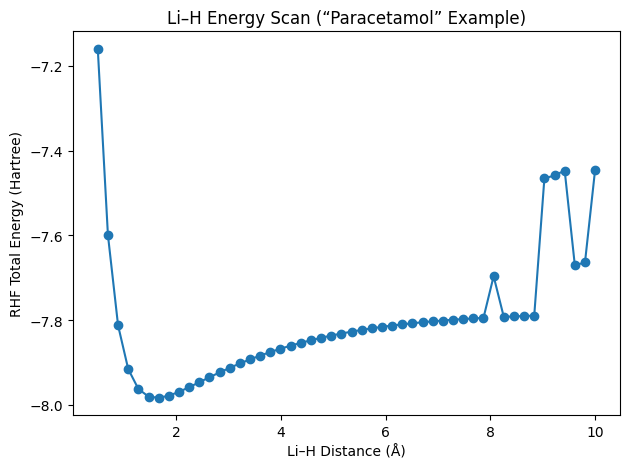

In [ ]:
import numpy as np
from pyscf import gto, scf
import matplotlib.pyplot as plt

# Define the range of Li–H distances (Å)
distances = np.linspace(0.5, 10.0, 50)
energies = []

# Loop over distances and compute RHF energy for each geometry
for d in distances:
    # Update the “paracetamol_xyz” string with the current H position
    paracetamol_xyz = f"""
    Li   0.0000    0.0000    0.0000
    H    0.0000    0.0000    {d:.4f}
    """

    mol = gto.M(
        atom   = paracetamol_xyz,
        basis  = 'cc-pVDZ',
        #basis  = 'sto-3g',
        unit   = 'Angstrom',
        charge = 0,   # neutral
        spin   = 0    # closed shell
    )

    mf = scf.RHF(mol)
    mf.conv_tol = 1e-10
    e = mf.kernel()
    print(e)
    energies.append(e)
print(energies)
# Plot Energy vs. Distance
plt.figure()
plt.plot(distances, energies, marker='o', linestyle='-')
plt.xlabel('Li–H Distance (Å)')
plt.ylabel('RHF Total Energy (Hartree)')
plt.title('Li–H Energy Scan (“Paracetamol” Example)')
plt.tight_layout()
plt.show()



Calculating at distance: 0.50 Å
Calculating at distance: 0.69 Å
Calculating at distance: 0.89 Å
Calculating at distance: 1.08 Å
Calculating at distance: 1.28 Å
Calculating at distance: 1.47 Å
Calculating at distance: 1.66 Å
Calculating at distance: 1.86 Å
Calculating at distance: 2.05 Å
Calculating at distance: 2.24 Å
Calculating at distance: 2.44 Å
Calculating at distance: 2.63 Å
Calculating at distance: 2.83 Å
Calculating at distance: 3.02 Å
Calculating at distance: 3.21 Å
Calculating at distance: 3.41 Å
Calculating at distance: 3.60 Å
Calculating at distance: 3.80 Å
Calculating at distance: 3.99 Å
Calculating at distance: 4.18 Å
Calculating at distance: 4.38 Å
Calculating at distance: 4.57 Å
Calculating at distance: 4.77 Å
Calculating at distance: 4.96 Å
Calculating at distance: 5.15 Å
Calculating at distance: 5.35 Å
Calculating at distance: 5.54 Å
Calculating at distance: 5.73 Å
Calculating at distance: 5.93 Å
Calculating at distance: 6.12 Å
Calculating at distance: 6.32 Å
Calculat

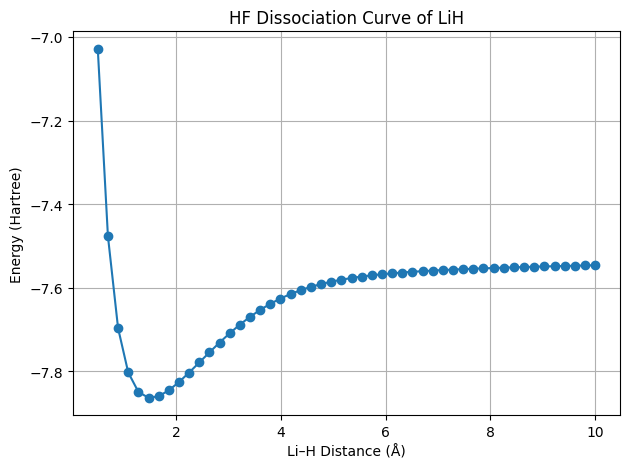

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf
import warnings

# Parameters
basis = 'sto-3g'
bond_lengths = np.linspace(0.5, 10.0, 50)
energies = []

# Store previous density matrix for warm start
prev_dm = None

for i, dist in enumerate(bond_lengths):
    print(f"Calculating at distance: {dist:.2f} Å")

    # Build molecule
    mol = gto.Mole()
    mol.atom = f"Li 0 0 0; H 0 0 {dist}"
    mol.basis = basis
    mol.spin = 0  # RHF
    mol.charge = 0
    mol.build()

    # RHF or UHF (you can switch to scf.UHF if needed)
    mf = scf.RHF(mol)
    mf.verbose = 0
    mf.conv_tol = 1e-9
    mf.max_cycle = 200
    mf.level_shift = 0.5
    mf.damp = 0.2

    # Reuse previous density matrix (warm start)
    if prev_dm is not None:
        mf.init_guess = 'atom'
        try:
            energy = mf.kernel(dm0=prev_dm)
        except Exception as e:
            print(f"SCF failed at {dist:.2f} Å with reuse, skipping...")
            energies.append(np.nan)
            continue
    else:
        try:
            energy = mf.kernel()
        except Exception as e:
            print(f"SCF failed at {dist:.2f} Å, skipping...")
            energies.append(np.nan)
            continue

    if mf.converged:
        energies.append(energy)
        prev_dm = mf.make_rdm1()  # Save converged density for next step
    else:
        print(f"SCF did not converge at {dist:.2f} Å")
        energies.append(np.nan)

# Plotting
plt.plot(bond_lengths, energies, '-o')
plt.xlabel("Li–H Distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("HF Dissociation Curve of LiH")
plt.grid(True)
plt.tight_layout()
plt.show()